# Diagonstic of Models

In [6]:
import pandas as pd 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dataset = pd.read_csv('../data/housing/data.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
model = smf.ols(formula='MEDV~LSTAT', data=dataset).fit()

# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

dataset['BestResponse'] = b0_ols + b1_ols*dataset['LSTAT']

# Assumptions behind linear regression model
1. Linearity 
2. independence
3. Normality
4. Equal Variance

## 1. Linearity

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

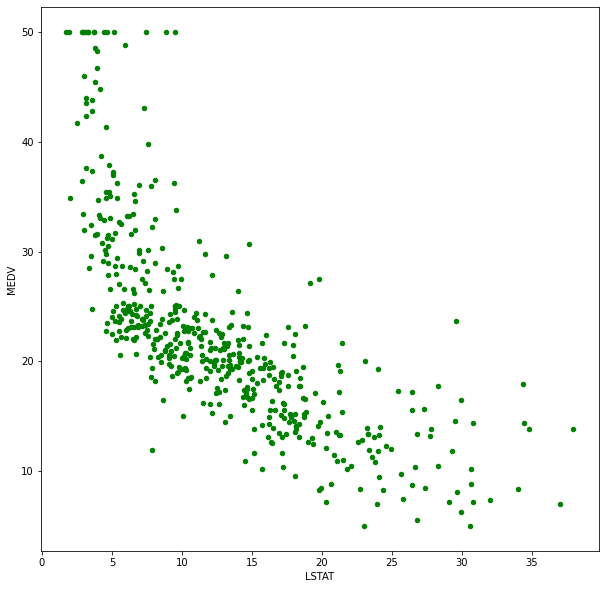

In [9]:
X = 'LSTAT'
Y = 'MEDV'
dataset.plot(kind='scatter', x=X, y=Y, figsize=(10, 10), color='g')

## 2. Independence

In [10]:
# Get all errors (residuals)
dataset['error'] = dataset['MEDV'] - dataset['BestResponse']

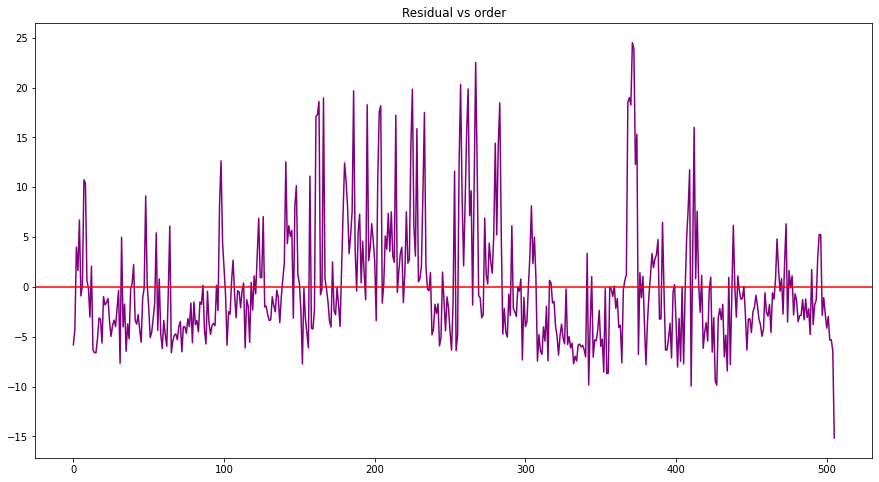

In [11]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(dataset.index, dataset['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [12]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        09:46:50   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Normality

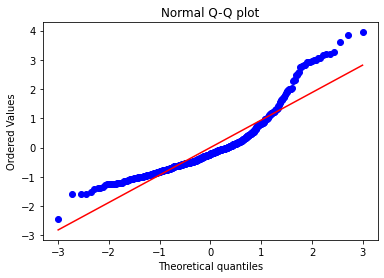

In [13]:
import scipy.stats as stats
z = (dataset['error'] - dataset['error'].mean())/dataset['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

## 4. Equal Variance

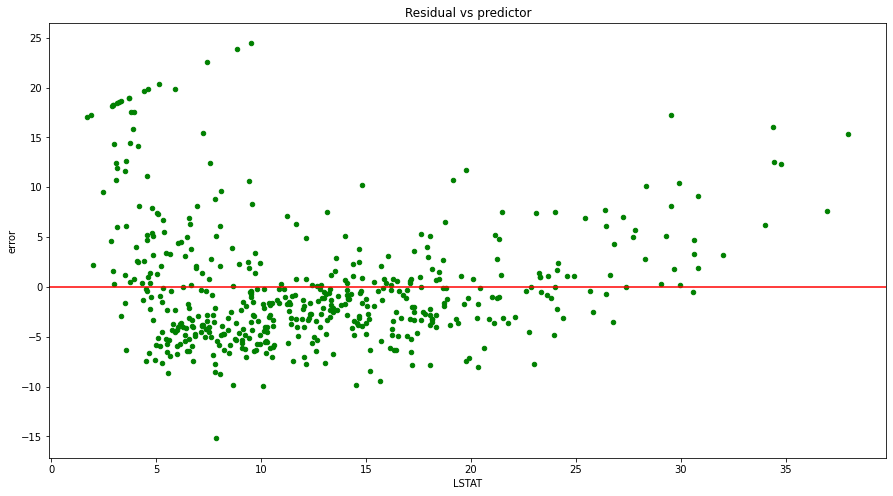

In [14]:
# Residual vs predictor plot
dataset.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()